In [71]:
import pandas as pd
df_titanic=pd.read_csv('titanic.csv')
df_titanic=pd.DataFrame(df_titanic)
df_titanic

import warnings
warnings.filterwarnings('ignore')

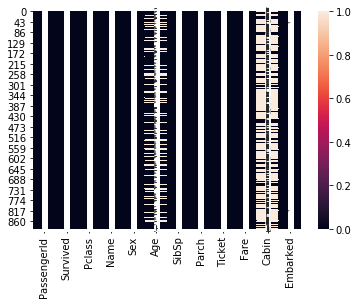

In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_titanic.isnull(),annot=True)
plt.show()

From above heatmap, we can see there are null values present in Columns/Attributes Age,Cabin,Embarked

In [73]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [74]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [76]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
df_titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

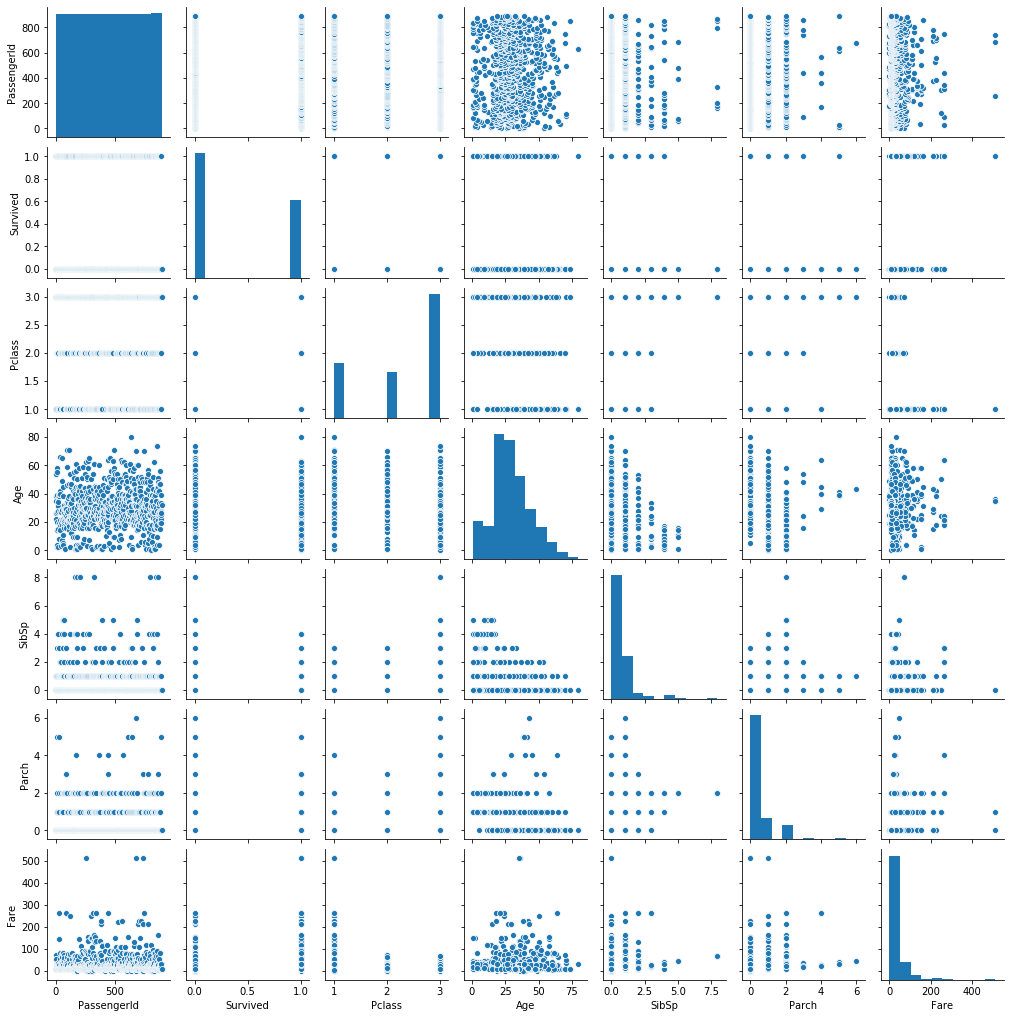

In [78]:
sns.pairplot(df_titanic,size=2)

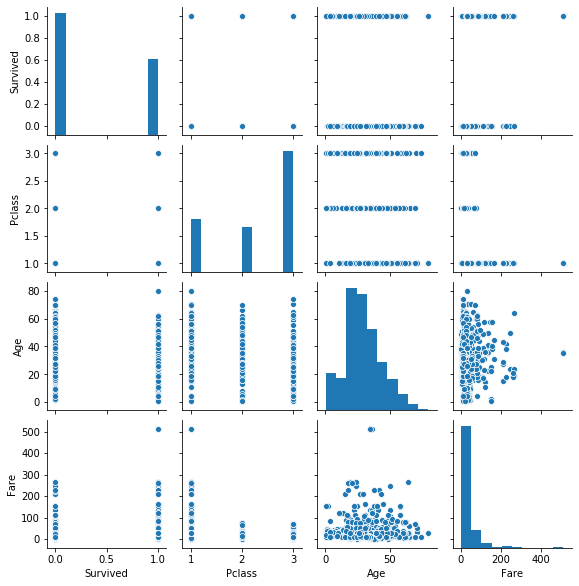

In [79]:
sns.pairplot(df_titanic[['Survived','Pclass','Age','Fare']],height=2)

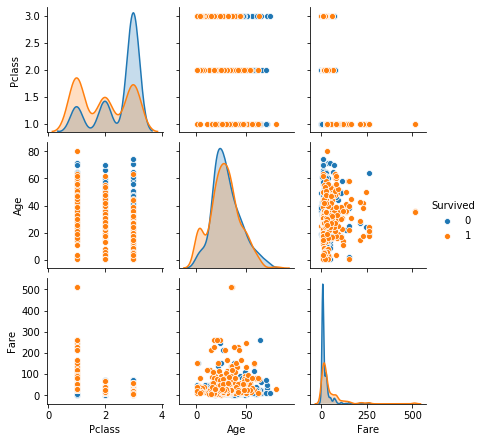

In [80]:
sns.pairplot(df_titanic[['Survived','Pclass','Age','Fare']],hue='Survived',height=2)

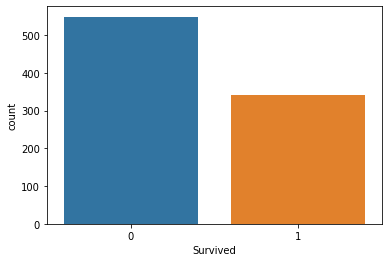

In [81]:
sns.countplot(df_titanic['Survived'])

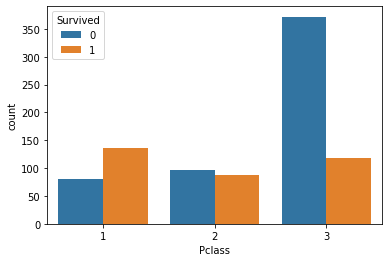

In [82]:
sns.countplot(df_titanic['Pclass'],hue=df_titanic['Survived'])

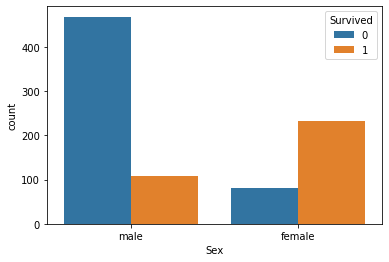

In [83]:
sns.countplot(df_titanic['Sex'],hue=df_titanic['Survived'])

In [84]:
df_titanic['Age'].isnull().sum()

177

In [85]:
df_titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [86]:
df_titanic['Age']=df_titanic['Age'].replace(np.NaN,df_titanic["Age"].mean())

In [87]:
df_titanic['Age'].isnull().sum()

0

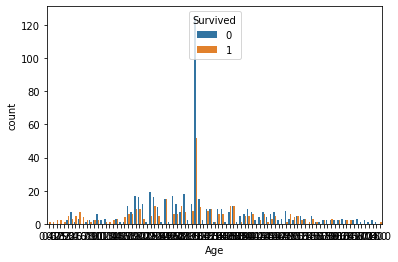

In [88]:
sns.countplot(df_titanic['Age'],hue=df_titanic['Survived'])

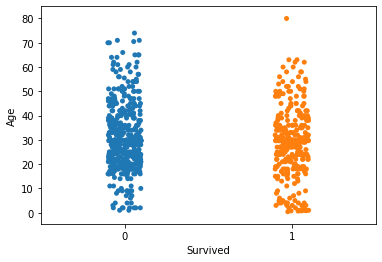

In [89]:
sns.stripplot(x='Survived',y="Age",data=df_titanic)

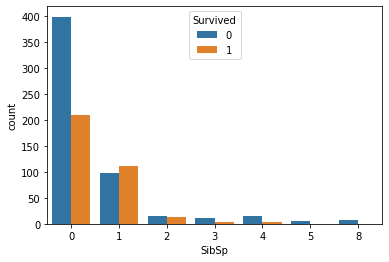

In [90]:
sns.countplot(df_titanic['SibSp'],hue=df_titanic['Survived'])

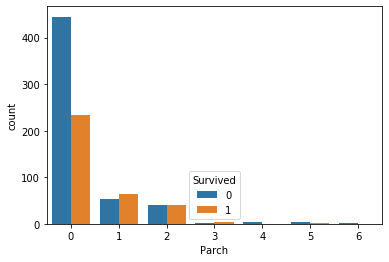

In [91]:
sns.countplot(df_titanic['Parch'],hue=df_titanic['Survived'])

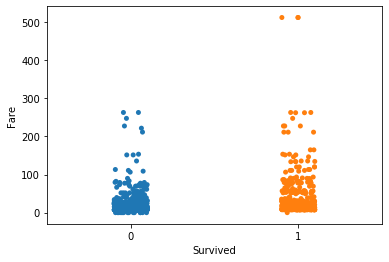

In [92]:
sns.stripplot(x='Survived',y="Fare",data=df_titanic)

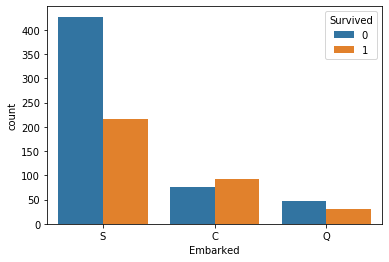

In [93]:
sns.countplot(df_titanic['Embarked'],hue=df_titanic['Survived'])

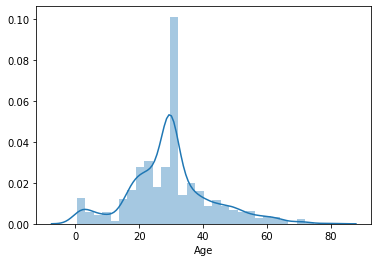

In [94]:
sns.distplot(df_titanic["Age"])

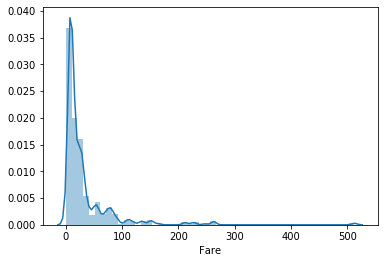

In [95]:
sns.distplot(df_titanic["Fare"])

In [96]:
df_titanic.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [101]:
from scipy.stats import zscore
zscore=np.abs(zscore(df_titanic[['Age','Fare']]))
print(zscore)

[[0.5924806  0.50244517]
 [0.63878901 0.78684529]
 [0.2846632  0.48885426]
 ...
 [0.         0.17626324]
 [0.2846632  0.04438104]
 [0.17706291 0.49237783]]


In [102]:
print(np.where(zscore>3))

(array([ 27,  88,  96, 116, 118, 258, 299, 311, 341, 377, 380, 438, 493,
       527, 557, 630, 672, 679, 689, 700, 716, 730, 737, 742, 745, 779,
       851], dtype=int64), array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0], dtype=int64))


In [103]:
zscore[27][1]

4.647001076532463

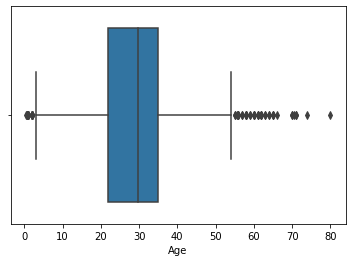

In [104]:
sns.boxplot(df_titanic["Age"])

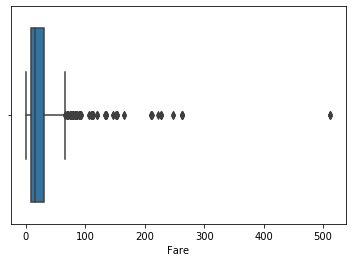

In [105]:
sns.boxplot(df_titanic["Fare"])

In [106]:
df_titanic_new=df_titanic[(zscore<3).all(axis=1)]

In [107]:
df_titanic.shape

(891, 12)

In [108]:
df_titanic_new.shape

(864, 12)

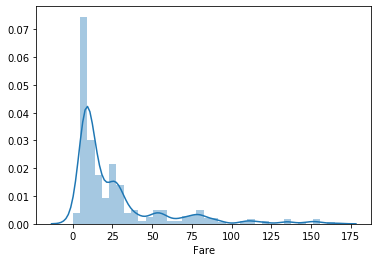

In [109]:
sns.distplot(df_titanic_new["Fare"])

In [110]:
df_titanic_new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [111]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
one=OneHotEncoder()
df_titanic_new['Sex']=one.fit_transform(df_titanic_new["Sex"])
df_titanic_new["Sex"]

ValueError: Expected 2D array, got 1D array instead:
array=['male' 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female' 'male'
 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'female' 'female' 'male' 'female' 'female'
 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female'
 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'female'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'female' 'male' 'male' 'female' 'female' 'female' 'female' 'female'
 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'female' 'female' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'male'
 'female' 'male' 'female' 'female' 'female' 'female' 'male' 'male' 'male'
 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'female'
 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female'
 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'female'
 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'female'
 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'male'
 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'female' 'female' 'female' 'female' 'female' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [112]:
sex=pd.get_dummies(df_titanic_new['Sex'],drop_first=True)
embark=pd.get_dummies(df_titanic_new['Embarked'],drop_first=True)

In [113]:
df_titanic_new.drop(['Sex','Embarked',"Cabin","Name",'Ticket'],axis=1,inplace=True)

In [114]:
df_titanic_new

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [115]:
df_titanic_new.dropna(inplace=True)

In [116]:
df_titanic=pd.concat([df_titanic_new,sex,embark],axis=1)

In [117]:
df_titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [118]:
df_titanic.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [119]:
df_titanic['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [120]:
x=df_titanic.drop('Survived',axis=1)
y=df_titanic['Survived']

In [121]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.72417906,  0.8017188 , -0.58662226, ...,  0.7330529 ,
        -0.31055869,  0.60587838],
       [-1.72029358, -1.64161469,  0.69509832, ..., -1.36415804,
        -0.31055869, -1.65049627],
       [-1.71640809,  0.8017188 , -0.26619211, ..., -1.36415804,
        -0.31055869,  0.60587838],
       ...,
       [ 1.7261308 ,  0.8017188 ,  0.03013509, ..., -1.36415804,
        -0.31055869,  0.60587838],
       [ 1.73001628, -1.64161469, -0.26619211, ...,  0.7330529 ,
        -0.31055869, -1.65049627],
       [ 1.73390176,  0.8017188 ,  0.21445311, ...,  0.7330529 ,
         3.22000327, -1.65049627]])

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [134]:
max_acc_scr=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),GaussianNB()]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accscr=accuracy_score(y_test,predm)
        conmatrix=confusion_matrix(y_test,predm)
        classreport=classification_report(y_test,predm)
        print("accuracy score of",m,'is:')
        print('accuracy score corresponding to random state:',r_state,'is:',accscr)
        print('confusion matrix corresponding to random state:',r_state,'is:',conmatrix)
        print('classification report corresponding to random state:',r_state,'is:',classreport)
        if accscr>max_acc_scr:
            max_acc_scr=accscr
            final_r_state=r_state
        print()        

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 42 is: 0.7283236994219653
confusion matrix corresponding to random state: 42 is: [[79 21]
 [26 47]]
classification report corresponding to random state: 42 is:               precision    recall  f1-score   support

           0       0.75      0.79      0.77       100
           1       0.69      0.64      0.67        73

    accuracy                           0.73       173
   macro avg       0.72      0.72      0.72       173
weighted avg       0.73      0.73      0.73       173


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_sha

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 45 is: 0.7803468208092486
confusion matrix corresponding to random state: 45 is: [[89 16]
 [22 46]]
classification report corresponding to random state: 45 is:               precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.74      0.68      0.71        68

    accuracy                           0.78       173
   macro avg       0.77      0.76      0.77       173
weighted avg       0.78      0.78      0.78       173


accuracy score of

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 49 is: 0.7803468208092486
confusion matrix corresponding to random state: 49 is: [[90 13]
 [25 45]]
classification report corresponding to random state: 49 is:               precision    recall  f1-score   support

           0       0.78      0.87      0.83       103
           1       0.78      0.64      0.70        70

    accuracy                           0.78       173
   macro avg       0.78      0.76      0.76       173
weighted avg       0.78      0.78      0.78       173


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_sha

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 52 is: 0.815028901734104
confusion matrix corresponding to random state: 52 is: [[104  10]
 [ 22  37]]
classification report corresponding to random state: 52 is:               precision    recall  f1-score   support

           0       0.83      0.91      0.87       114
           1       0.79      0.63      0.70        59

    accuracy                           0.82       173
   macro avg       0.81      0.77      0.78       173
weighted avg       0.81      0.82      0.81       173


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                   

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 55 is: 0.8439306358381503
confusion matrix corresponding to random state: 55 is: [[114   6]
 [ 21  32]]
classification report corresponding to random state: 55 is:               precision    recall  f1-score   support

           0       0.84      0.95      0.89       120
           1       0.84      0.60      0.70        53

    accuracy                           0.84       173
   macro avg       0.84      0.78      0.80       173
weighted avg       0.84      0.84      0.84       173


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 59 is: 0.7572254335260116
confusion matrix corresponding to random state: 59 is: [[87 21]
 [21 44]]
classification report corresponding to random state: 59 is:               precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.68      0.68      0.68        65

    accuracy                           0.76       173
   macro avg       0.74      0.74      0.74       173
weighted avg       0.76      0.76      0.76       173


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_sha

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 62 is: 0.8497109826589595
confusion matrix corresponding to random state: 62 is: [[107   4]
 [ 22  40]]
classification report corresponding to random state: 62 is:               precision    recall  f1-score   support

           0       0.83      0.96      0.89       111
           1       0.91      0.65      0.75        62

    accuracy                           0.85       173
   macro avg       0.87      0.80      0.82       173
weighted avg       0.86      0.85      0.84       173


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

classification report corresponding to random state: 65 is:               precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.81      0.68      0.74        73

    accuracy                           0.80       173
   macro avg       0.80      0.78      0.79       173
weighted avg       0.80      0.80      0.79       173


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 65 is: 0.7052023121387283
confusion matrix corresponding to random state: 65 is: [[76 24]
 [27 46]]
classification re

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 69 is: 0.8554913294797688
confusion matrix corresponding to random state: 69 is: [[99  2]
 [23 49]]
classification report corresponding to random state: 69 is:               precision    recall  f1-score   support

           0       0.81      0.98      0.89       101
           1       0.96      0.68      0.80        72

    accuracy                           0.86       173
   macro avg       0.89      0.83      0.84       173
weighted avg       0.87      0.86      0.85       173


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 73 is: 0.7630057803468208
confusion matrix corresponding to random state: 73 is: [[90 19]
 [22 42]]
classification report corresponding to random state: 73 is:               precision    recall  f1-score   support

           0       0.80      0.83      0.81       109
           1       0.69      0.66      0.67        64

    accuracy                           0.76       173
   macro avg       0.75      0.74      0.74       173
weighted avg       0.76      0.76      0.76       173


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_sha

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 76 is: 0.8265895953757225
confusion matrix corresponding to random state: 76 is: [[94  8]
 [22 49]]
classification report corresponding to random state: 76 is:               precision    recall  f1-score   support

           0       0.81      0.92      0.86       102
           1       0.86      0.69      0.77        71

    accuracy                           0.83       173
   macro avg       0.83      0.81      0.81       173
weighted avg       0.83      0.83      0.82       173


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                      

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 79 is: 0.815028901734104
confusion matrix corresponding to random state: 79 is: [[96 11]
 [21 45]]
classification report corresponding to random state: 79 is:               precision    recall  f1-score   support

           0       0.82      0.90      0.86       107
           1       0.80      0.68      0.74        66

    accuracy                           0.82       173
   macro avg       0.81      0.79      0.80       173
weighted avg       0.81      0.82      0.81       173


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 83 is: 0.7630057803468208
confusion matrix corresponding to random state: 83 is: [[94 25]
 [16 38]]
classification report corresponding to random state: 83 is:               precision    recall  f1-score   support

           0       0.85      0.79      0.82       119
           1       0.60      0.70      0.65        54

    accuracy                           0.76       173
   macro avg       0.73      0.75      0.74       173
weighted avg       0.78      0.76      0.77       173


accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 84 is

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 87 is: 0.8034682080924855
confusion matrix corresponding to random state: 87 is: [[96  9]
 [25 43]]
classification report corresponding to random state: 87 is:               precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.83      0.63      0.72        68

    accuracy                           0.80       173
   macro avg       0.81      0.77      0.78       173
weighted avg       0.81      0.80      0.80       173


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                      

accuracy score corresponding to random state: 90 is: 0.7803468208092486
confusion matrix corresponding to random state: 90 is: [[87 15]
 [23 48]]
classification report corresponding to random state: 90 is:               precision    recall  f1-score   support

           0       0.79      0.85      0.82       102
           1       0.76      0.68      0.72        71

    accuracy                           0.78       173
   macro avg       0.78      0.76      0.77       173
weighted avg       0.78      0.78      0.78       173


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 90 is: 0.838150289017341
confusion matrix corresponding to random state: 90 is: [[90 12]
 [16 55]]
classification report corresponding to random state: 90 is:               precision    recall  f1-score   support

           0       0.85      0.88      0.87       102
           1       0.82      0.77      0.80        71

    accuracy                  

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 93 is: 0.7341040462427746
confusion matrix corresponding to random state: 93 is: [[86 23]
 [23 41]]
classification report corresponding to random state: 93 is:               precision    recall  f1-score   support

           0       0.79      0.79      0.79       109
           1       0.64      0.64      0.64        64

    accuracy                           0.73       173
   macro avg       0.71      0.71      0.71       173
weighted avg       0.73      0.73      0.73       173


accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 94 is

                   warm_start=False) is:
accuracy score corresponding to random state: 97 is: 0.7803468208092486
confusion matrix corresponding to random state: 97 is: [[91 19]
 [19 44]]
classification report corresponding to random state: 97 is:               precision    recall  f1-score   support

           0       0.83      0.83      0.83       110
           1       0.70      0.70      0.70        63

    accuracy                           0.78       173
   macro avg       0.76      0.76      0.76       173
weighted avg       0.78      0.78      0.78       173


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 97 is: 0.8092485549132948
confusion matrix corresponding to random state: 97 is: [[96 14]
 [19 44]]
classif

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 100 is: 0.8092485549132948
confusion matrix corresponding to random state: 100 is: [[96 14]
 [19 44]]
classification report corresponding to random state: 100 is:               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.76      0.70      0.73        63

    accuracy                           0.81       173
   macro avg       0.80      0.79      0.79       173
weighted avg       0.81      0.81      0.81       173


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                   

In [135]:
print("Max accuracy Score corresponding to random state",final_r_state,'and model',m,"is",max_acc_scr)

Max accuracy Score corresponding to random state 63 and model GaussianNB(priors=None, var_smoothing=1e-09) is 0.861271676300578


In [136]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(sklearn.naive_bayes.GaussianNB(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.7283237  0.76300578 0.78034682 0.80346821 0.77906977]
0.7708428552224762
0.024866521465727306


In [137]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)
enr.fit(x_train,y_train)
print(enr.score(x_train,y_train))

0.39330719857997176


In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63,test_size=0.20)
gnb=sklearn.naive_bayes.GaussianNB()
gnb.fit(x_train,y_train)
ypred=gnb.predict(x_test)

In [128]:
from sklearn.externals import joblib
joblib.dump(gnb,'gnb_titanicdataset.pkl')

['gnb_titanicdataset.pkl']